Stellar Populations: Intro to Probability and Stats 

Problem 3:

(a)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
import corner

In [2]:
def fake_data(m, b, n_points, error_bar=5, xlim=10):
    """
    create fake data data that fits: y_model = mx +b
    assume y has error following a gaussian noise ~(0,1)*sigma
    where sigma is also gaussian distributed ~(0, 1)*error_bar
    Input:
        n_points: the number of data points created
        error_size: the size of the y error
        xlim: x ranges from 0 to xlim
    Output:
        x, y, yerr """
    x = np.random.random(n_points) * xlim
    y = m*x + b
    sigma = np.abs(np.random.normal(size = n_points)*error_bar)
    yerr = np.random.normal(size = n_points)*sigma
    y += yerr
    return x,y,sigma

In [3]:
def ln_flat_prior(theta):
    """
    assume a flat prior, p=1, lnp=0"""
    return 0

In [4]:
def ln_likelyhood(x, y, yerr, theta):
    m = theta[0]
    b = theta[1]
    y_model = m*x + b
    lnP = - (np.log(yerr) + (y-y_model)**2/(2*yerr**2))
    return np.sum(lnP)

In [5]:
def ln_posterior(theta, x, y, yerr):
    return ln_flat_prior(theta) + ln_likelyhood(x, y, yerr, theta)

In [6]:
def proposal(theta_now, step_size):
    """
    define proposal density distribution P(theta_i+1|theta_i)
    I use a gaussian distribution centered at theta_i, with sigma = step_size
    """
    theta_next = np.random.normal(theta_now, step_size)
    return theta_next

In [7]:
def MH_MCMC(x, y, yerr, theta0, steps, step_size):
    """
    derive sample based on posterior using Metropolis-Hastings MCMC
    Input:
        x, y, yerr: data points
        theta0 = [m0, b0]: starting point
        steps: how many steps in the chain
        step_size: size from theta_i to theta_i+1, goes into proposal
    Output:
        theta = [mi, bi]: sampling parameters
        lnP: ln posterior for theta
        accept: acceptance fraction
    """
    # initialize model paramters theta, lnP, acceptance
    theta = np.zeros((steps, len(theta0)))
    lnP = np.zeros(steps)
    accept = 0
    theta[0] = theta0
    #pdb.set_trace()
    lnP[0] = ln_posterior(theta[0], x, y, yerr)
    
    # loop through steps
    for i in range(steps-1):
        theta[i+1] = proposal(theta[i], step_size)
        # see how theta[i+1][0] affects lnP
        lnP[i+1] = ln_posterior( [theta[i+1][0], theta[i][1]], x, y, yerr)
        alpha = np.exp(lnP[i+1] - lnP[i])
        accept += 1
        if alpha < np.random.random():
            theta[i+1][0] = theta[i][0]
            lnP[i+1] = lnP[i]
            accept -= 1
        # see how theta[i+1][1] affects lnP
        lnP[i+1] = ln_posterior( [theta[i+1][0], theta[i+1][1]], x, y, yerr)
        alpha = np.exp(lnP[i+1] - lnP[i])
        accept += 1
        if alpha < np.random.random():
            theta[i+1][1] = theta[i][1]
            lnP[i+1] = lnP[i]
            accept -= 1
    return theta, lnP, accept/(2*steps)

In [8]:
def verify_conv(theta, lnP, n_points):
    # lnP vs m
    plt.figure()
    plt.clf()
    plt.plot(theta[:,0], lnP, 'o')
    plt.xlabel('m')
    plt.ylabel('lnP')
    plt.title("%d points" %(n_points))
    #plt.ylim(-50, 0)

    # lnP vs b
    plt.figure()
    plt.clf()
    plt.plot(theta[:,1], lnP, 'o')
    plt.xlabel('b')
    plt.ylabel('lnP')
    plt.title("%d points" %(n_points))
    #plt.ylim(-50, 0)
    
    # lnP vs stepnumber
    plt.figure()
    plt.clf()
    plt.plot(lnP)
    plt.xlabel('step number')
    plt.ylabel('lnP')
    plt.ylim(np.percentile(lnP, 0.5), np.max(lnP))
    # lnP can be very small at burn-in, so I limit the y range with 2% beginning
    #plt.xlim(5000, len(lnP))
    plt.title("%d points" %(n_points))

    return

In [9]:
def test_MYmcmc(n_points, m_real=5, b_real=-2, steps=10000, theta0=[0,0], step_size=[1,1]):
    """
    use M-H MCMC I wrote to infer the true value of m and b
    Input:
        n_points: number of data points"""
    print('\n' + '*'*10 + 'using %d points' %n_points + '*'*10)
    x,y,yerr = fake_data(m_real, b_real, n_points)

    
    theta, lnP, acc = MH_MCMC(x, y, yerr, theta0, steps, step_size)
    print("acceptance fraction is %.2f" %acc)
    verify_conv(theta, lnP, n_points)
    corner.corner(theta, labels=['m', 'b'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
    
    # plot the best fitting result
    plt.figure()
    plt.errorbar(x, y, yerr, fmt='o', label='data')
    m_infer = np.percentile(theta[:,0], 50)
    b_infer = np.percentile(theta[:,1], 50)
    plt.plot(x, m_infer*x + b_infer, label='model')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    return 


**********using 10 points**********


/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in exp
/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp


acceptance fraction is 0.03


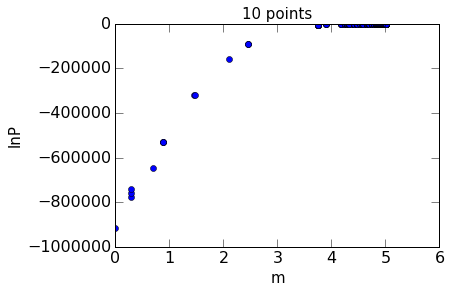

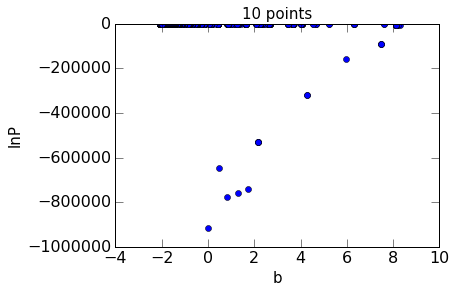

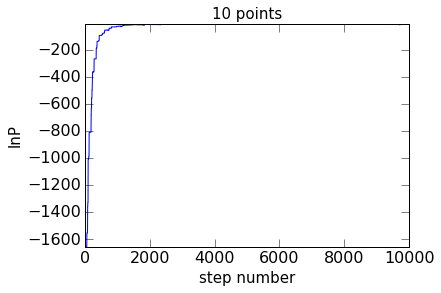

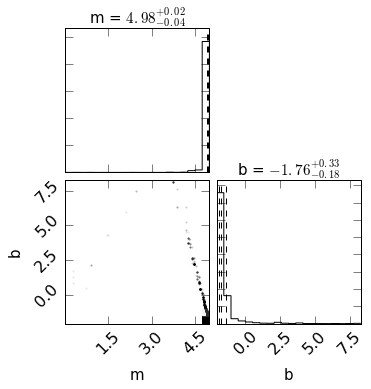

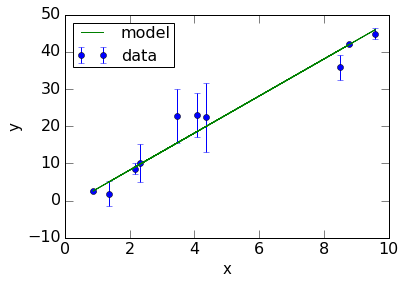

In [10]:
# use 10, 100, 1000 data points
test_MYmcmc(10, step_size=[0.5,1], theta0=[0,0])




**********using 100 points**********


/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in exp
/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp


acceptance fraction is 0.06


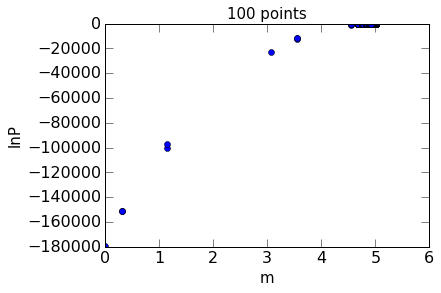

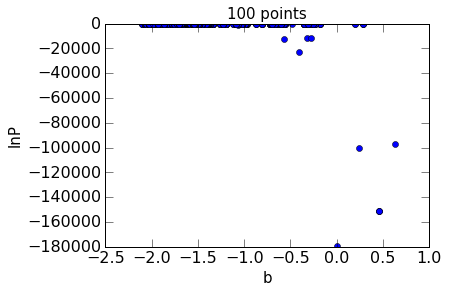

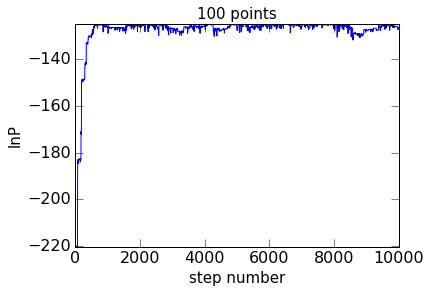

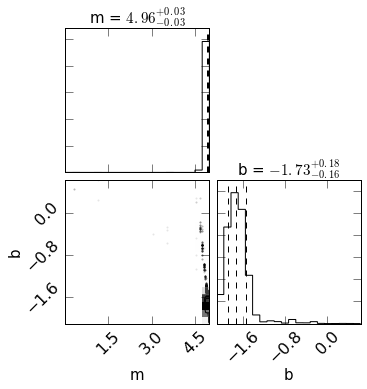

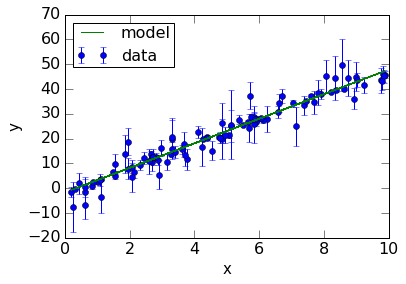

In [14]:
# use 10, 100, 1000 data points
test_MYmcmc(100, step_size=[1,0.5], theta0=[0,0])



**********using 1000 points**********


/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in exp
/Users/siyao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: overflow encountered in exp


acceptance fraction is 0.01


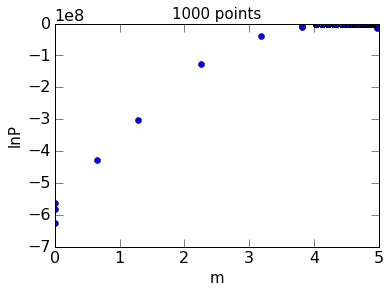

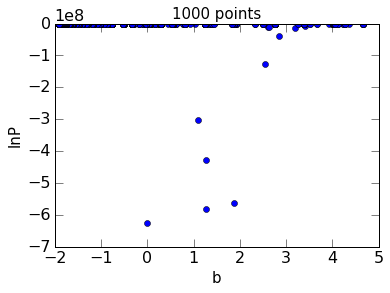

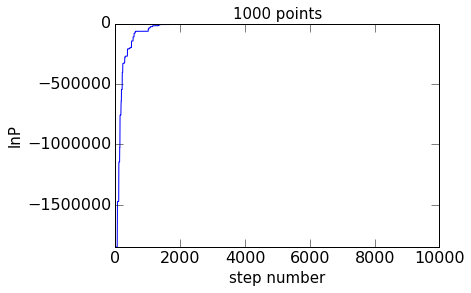

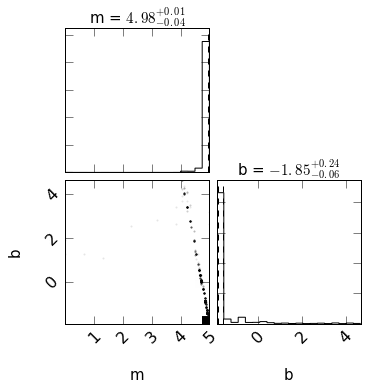

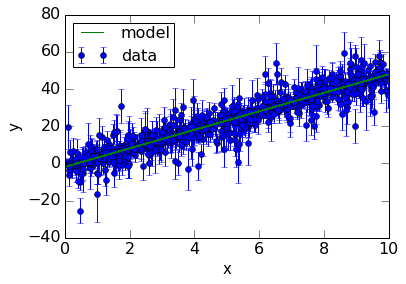

In [13]:
# use 1000 data points
test_MYmcmc(1000, step_size=[1,0.5], theta0=[0,0])



(b)



In [15]:
import emcee

In [16]:
def test_emcee(n_points, m_real=5, b_real=-2, steps=500, ndim=2, nwalkers=100, lnP=ln_posterior):
    """
    use emcee to infer the true value of m and b
    Input:
        n_points: number of data points"""
    print('\n' + '*'*10 + 'using %d points' %n_points + '*'*10)
    x,y,yerr = fake_data(m_real, b_real, n_points)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnP, args=(x, y, yerr))
    pos = [np.random.rand(ndim) for i in range(nwalkers)]
    sampler.run_mcmc(pos, steps)
    theta = sampler.chain.reshape((-1, ndim))
    
    corner.corner(theta, labels=['m', 'b'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
    # plot the best fitting result
    plt.figure()
    plt.errorbar(x, y, yerr, fmt='o', label='data')
    m_infer = np.percentile(theta[:,0], 50)
    b_infer = np.percentile(theta[:,1], 50)
    plt.plot(x, m_infer*x + b_infer, label='model')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    return 


**********using 10 points**********


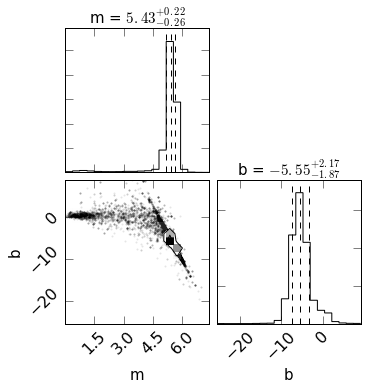

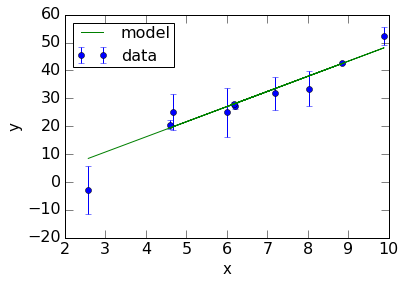

In [18]:
test_emcee(10)


**********using 100 points**********


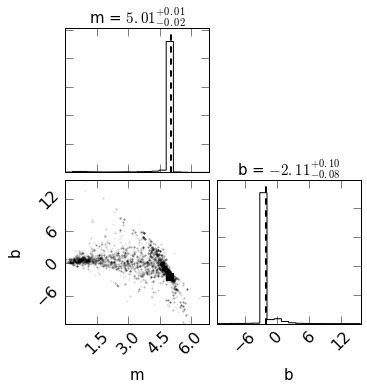

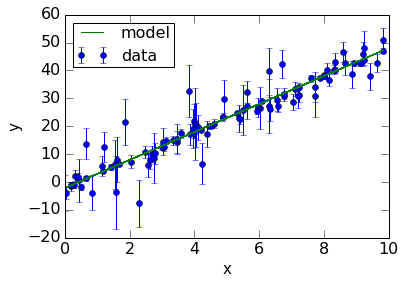

In [19]:
test_emcee(100)


**********using 1000 points**********


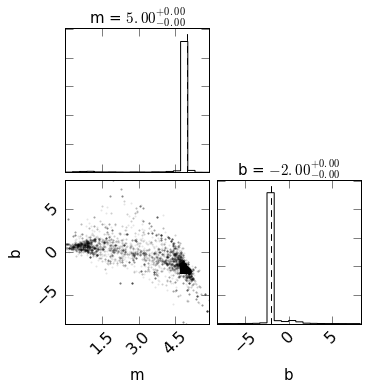

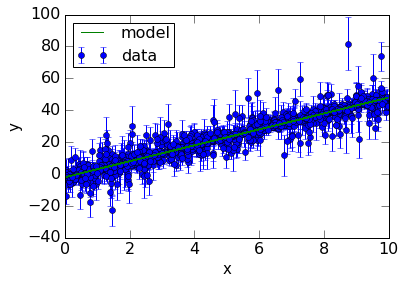

In [20]:
test_emcee(1000)

(c)

In [21]:
def ln_gs_prior(theta, m_mean=0, b_mean=0, m_error=1, b_error=1):
    """
    assume a gaussian prior,
    m ~ N(m_mean, m_error)
    b ~ N(b_mean, b_error)"""
    lnP = - (np.log(m_error) + (theta[0]-m_mean)**2/(2*m_error**2))
    lnP += - (np.log(b_error) + (theta[1]-b_mean)**2/(2*b_error**2))
    return lnP

In [22]:
def ln_posterior_gs(theta, x, y, yerr):
    return ln_gs_prior(theta) + ln_likelyhood(x, y, yerr, theta)


**********using 10 points**********


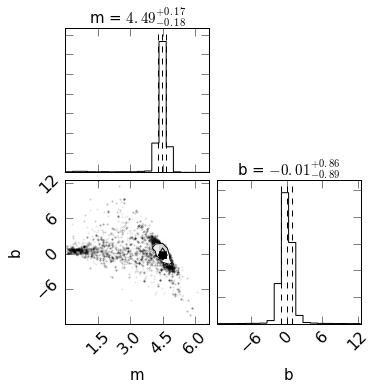

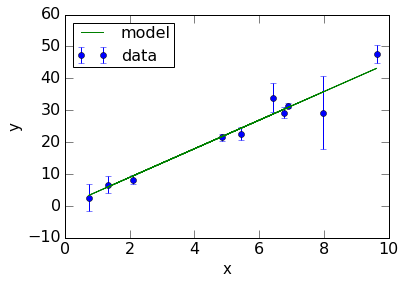

In [23]:
test_emcee(10, lnP=ln_posterior_gs)


**********using 1000 points**********


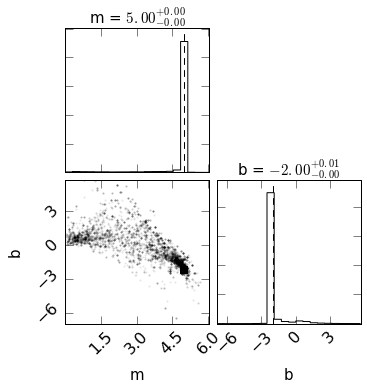

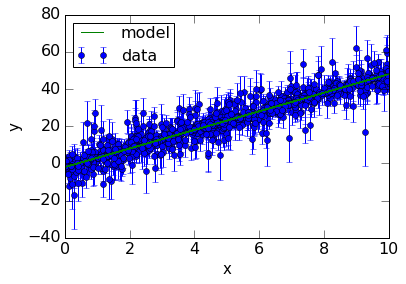

In [24]:
test_emcee(1000, lnP=ln_posterior_gs)

From the comparsion, we can see that the prior has largger effects on small N than large N, which means when you have larger number of data, the prior won't affect results as much. So if you are not sure about your prior, try to get more data.

(d)

In [25]:
def fake_data_d(m, b, scatter, n_points, error_bar=3, xlim=10):
    """
    create fake data data that fits: y_model = mx +b
    assume y has error following a gaussian noise ~(0,1)*sigma
    where sigma^2 = sigma_data^2 + scatter^2
    sigma_data is also gaussian distributed ~(0, 1)*error_bar
    Input:
        n_points: the number of data points created
        error_size: the size of the y error
        xlim: x ranges from 0 to xlim
    Output:
        x, y, sigma_data """
    x = np.random.random(n_points) * xlim
    y = m*x + b
    sigma_data = np.abs(np.random.normal(size=n_points)*error_bar)
    sigma = np.sqrt(sigma_data**2 + scatter**2)
    yerr = np.random.normal(size=n_points)*sigma
    y += yerr
    return x,y,sigma_data

In [26]:
def ln_likelyhood_d(x, y, yerr, theta):
    m = theta[0]
    b = theta[1]
    scatter = theta[2]
    yerr = np.sqrt(scatter**2 + yerr**2)
    y_model = m*x + b
    lnP = - (np.log(yerr) + (y-y_model)**2/(2*yerr**2))
    return np.sum(lnP)

In [27]:
def ln_prior_d(theta):
    """
    assume m, b is flat and scatter is "Jeffreys Prior"
    """
    m = theta[0]
    b = theta[1]
    scatter = theta[2]
    if scatter > 0:
        lnP = -np.log(scatter)
    else:
        lnP = -1e20
    return lnP

In [28]:
def ln_posterior_d(theta, x, y, yerr):
    return ln_prior_d(theta) + ln_likelyhood_d(x, y, yerr, theta)

In [29]:
def test_emcee_d(n_points, m_real=5, b_real=-2, scatter_real=2, steps=500, ndim=3, nwalkers=100, lnP=ln_posterior_d):
    """
    use emcee to infer the true value of m and b
    Input:
        n_points: number of data points"""
    print('\n' + '*'*10 + 'using %d points' %n_points + '*'*10)
    x,y,yerr = fake_data_d(m_real, b_real, scatter_real, n_points)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnP, args=(x, y, yerr))
    pos = [np.random.rand(ndim) for i in range(nwalkers)]
    sampler.run_mcmc(pos, steps)
    theta = sampler.chain.reshape((-1, ndim))
    
    corner.corner(theta, labels=['m', 'b', 'scatter'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
    # plot the best fitting result
    plt.figure()
    plt.errorbar(x, y, yerr, fmt='o', label='data')
    m_infer = np.percentile(theta[:,0], 50)
    b_infer = np.percentile(theta[:,1], 50)
    plt.plot(x, m_infer*x + b_infer, label='model')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    return 


**********using 10 points**********


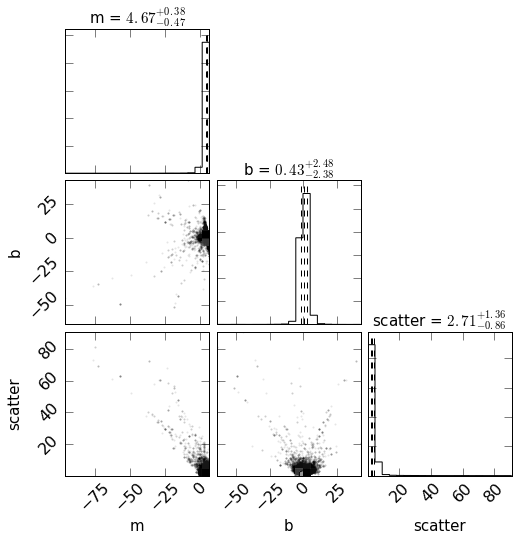

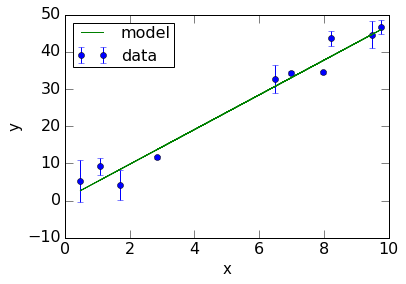

In [30]:
test_emcee_d(10)


**********using 100 points**********


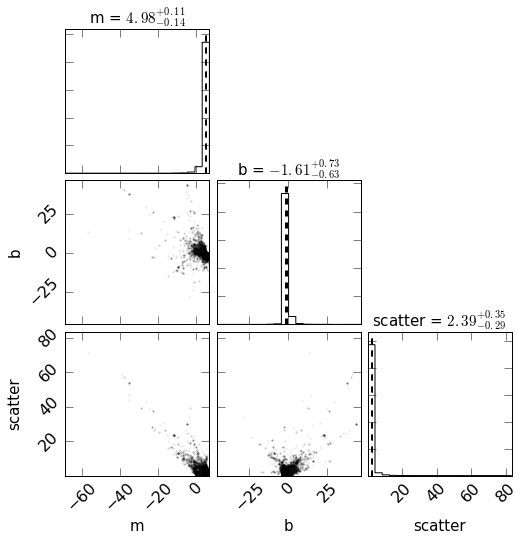

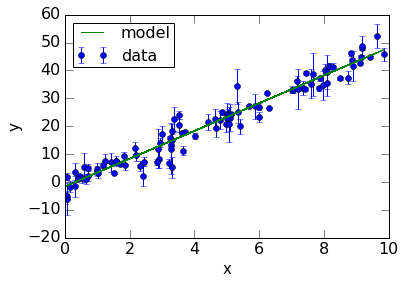

In [31]:
test_emcee_d(100)


**********using 1000 points**********


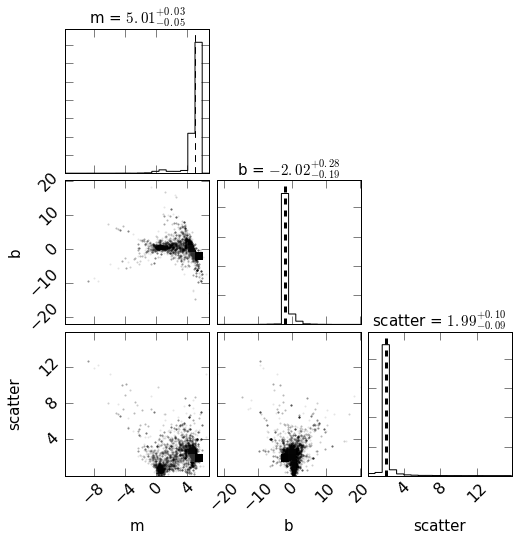

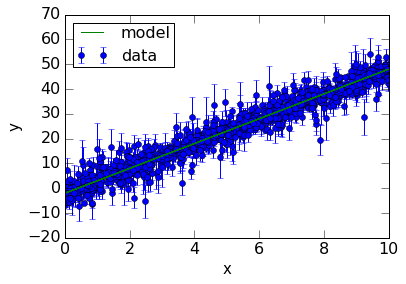

In [32]:
test_emcee_d(1000)

(e)

The scatter can also be viewed as "nuisance parameter", because I don't care about scatter, but it affects likelyhood.